# Data Preprocessing

## Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime

#Importing the Datasets

In [12]:
dataset_training = pd.read_csv('bitcoin_price_Training.csv')
# dataset_test = pd.read_csv('bitcoin_price_Test.csv')

dataset_training['Date'] = pd.to_datetime(dataset_training['Date'])
data = dataset_training.set_index('Date')

data_open = data[['Open']]
# inserting new column with yesterday's consumption values
data_open.loc[:,'Yesterday'] = data_open.loc[:,'Open'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_open.loc[:,'Yesterday_Diff'] = data_open.loc[:,'Yesterday'].diff()
# dropping NAs
data_open = data_open.dropna()
print(data_open)


               Open  Yesterday  Yesterday_Diff
Date                                          
2017-07-29  2807.02    2724.39          -38.85
2017-07-28  2679.73    2807.02           82.63
2017-07-27  2538.71    2679.73         -127.29
2017-07-26  2577.77    2538.71         -141.02
2017-07-25  2757.50    2577.77           39.06
...             ...        ...             ...
2013-05-02   116.38     106.25            8.15
2013-05-01   139.00     116.38           10.13
2013-04-30   144.00     139.00           22.62
2013-04-29   134.44     144.00            5.00
2013-04-28   135.30     134.44           -9.56

[1554 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


## Regression metrics

In [14]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [32]:
X_train = data_open[:'2016'].drop(['Open'], axis = 1)
y_train = data_open.loc[:'2016', 'Open']
X_test = data_open['2017'].drop(['Open'], axis = 1)
y_test = data_open.loc['2017', 'Open']
print(X_train)
print(y_train)

DatetimeIndex(['2016-01-01', '2015-12-31', '2015-12-30', '2015-12-29',
               '2015-12-28', '2015-12-27', '2015-12-26', '2015-12-25',
               '2015-12-24', '2015-12-23',
               ...
               '2013-05-07', '2013-05-06', '2013-05-05', '2013-05-04',
               '2013-05-03', '2013-05-02', '2013-05-01', '2013-04-30',
               '2013-04-29', '2013-04-28'],
              dtype='datetime64[ns]', name='Date', length=979, freq=None)
Date
2016-01-01    430.72
2015-12-31    425.88
2015-12-30    433.30
2015-12-29    422.10
2015-12-28    423.34
               ...  
2013-05-02    116.38
2013-05-01    139.00
2013-04-30    144.00
2013-04-29    134.44
2013-04-28    135.30
Name: Open, Length: 979, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Training different types of regression algorithms

### Ridge regression

In [43]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=10)
reg.fit(X_train,y_train)

# explained_variance:  0.9853
# mean_squared_log_error:  0.0019
# r2:  0.9853
# MAE:  51.6452
# MSE:  6802.4182
# RMSE:  82.4768

Ridge(alpha=10)

### LARS Lasso

In [37]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1, normalize=False)
reg.fit(X_train,y_train)

# explained_variance:  0.9853
# mean_squared_log_error:  0.0019
# r2:  0.9853
# MAE:  51.6452
# MSE:  6802.4182
# RMSE:  82.4768

LassoLars(alpha=0.1, normalize=False)

## Visualizeing Results

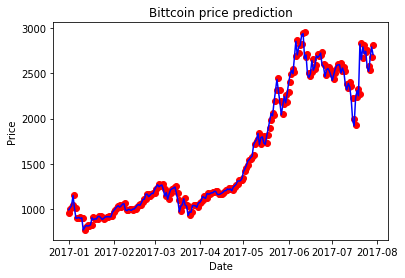

In [41]:
# plt.scatter(X_train.index, y_train, color = 'red')
# plt.plot(X_train.index, reg.predict(X_train), color = 'blue')
plt.scatter(X_test.index, y_test, color = 'red')
plt.plot(X_test.index, reg.predict(X_test), color = 'blue')
plt.title('Bittcoin price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Printing the regression results

In [44]:
y_true = y_test.values
y_pred = reg.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.9853
mean_squared_log_error:  0.0019
r2:  0.9853
MAE:  51.6452
MSE:  6802.4182
RMSE:  82.4768
